# Import Library

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Import Data & Data Cleaning

In [145]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/sales_data.csv')
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [146]:
df.shape

(185950, 11)

In [147]:
df.isna().sum()

Order Date          0
Order ID            0
Product             0
Product_ean         0
catégorie           0
Purchase Address    0
Quantity Ordered    0
Price Each          0
Cost price          0
turnover            0
margin              0
dtype: int64

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


In [149]:
df.duplicated().sum()

0

In [150]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order Date        185950 non-null  datetime64[ns]
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Product_ean       185950 non-null  float64       
 4   catégorie         185950 non-null  object        
 5   Purchase Address  185950 non-null  object        
 6   Quantity Ordered  185950 non-null  int64         
 7   Price Each        185950 non-null  float64       
 8   Cost price        185950 non-null  float64       
 9   turnover          185950 non-null  float64       
 10  margin            185950 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 15.6+ MB


In [151]:
df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [152]:
df['catégorie'].value_counts()

Sports          46925
Vêtements       46405
Alimentation    46342
Électronique    46278
Name: catégorie, dtype: int64

In [153]:
df.rename(columns={'catégorie':'Category'}, inplace=True)
df.head()

,Order Date,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [154]:
df[['Adress', 'City', 'Postal Code']] = df['Purchase Address'].str.split(', ', expand=True)
df.head()

,Order Date,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Adress,City,Postal Code
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,944 Walnut St,Boston,MA 02215
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,185 Maple St,Portland,OR 97035
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,538 Adams St,San Francisco,CA 94016
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,738 10th St,Los Angeles,CA 90001
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,387 10th St,Austin,TX 73301


In [155]:
df['City'].value_counts()

San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: City, dtype: int64

In [156]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df.head()

,Order Date,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Adress,City,Postal Code,Year,Month,Day
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,944 Walnut St,Boston,MA 02215,2019,1,22
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,185 Maple St,Portland,OR 97035,2019,1,28
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,538 Adams St,San Francisco,CA 94016,2019,1,17
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,738 10th St,Los Angeles,CA 90001,2019,1,5
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,387 10th St,Austin,TX 73301,2019,1,25


In [157]:
df['Year'].value_counts()

2019    185916
2020        34
Name: Year, dtype: int64

In [158]:
df.drop(['Category', 'Product_ean', 'Purchase Address', 'Price Each', 'Cost price', 'margin'],axis=1,inplace=True)
df.tail()

,Order Date,Order ID,Product,Quantity Ordered,turnover,Adress,City,Postal Code,Year,Month,Day
185945,2019-12-11 20:58:00,319666,Lightning Charging Cable,1,14.95,14 Madison St,San Francisco,CA 94016,2019,12,11
185946,2019-12-01 12:01:00,319667,AA Batteries (4-pack),2,7.68,549 Willow St,Los Angeles,CA 90001,2019,12,1
185947,2019-12-09 06:43:00,319668,Vareebadd Phone,1,400.00,273 Wilson St,Seattle,WA 98101,2019,12,9
185948,2019-12-03 10:39:00,319669,Wired Headphones,1,11.99,778 River St,Dallas,TX 75001,2019,12,3
185949,2019-12-21 21:45:00,319670,Bose SoundSport Headphones,1,99.99,747 Chestnut St,Los Angeles,CA 90001,2019,12,21


# EDA & Data Visualization


In [159]:
df.corr()

<ipython-input-159-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Order ID,Quantity Ordered,turnover,Year,Month,Day
Order ID,1.000000,0.000702,-0.002949,0.020130,0.993063,0.016283
Quantity Ordered,0.000702,1.000000,-0.139417,0.002489,0.000791,0.001224
turnover,-0.002949,-0.139417,1.000000,0.002824,-0.003466,-0.002580
Year,0.020130,0.002489,0.002824,1.000000,-0.023391,-0.022728
Month,0.993063,0.000791,-0.003466,-0.023391,1.000000,0.016394
Day,0.016283,0.001224,-0.002580,-0.022728,0.016394,1.000000


In [160]:
df.describe()

,Order ID,Quantity Ordered,turnover,Year,Month,Day
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,185.490917,2019.000183,7.059140,15.759532
std,51512.737110,0.442793,332.919771,0.013521,3.502996,8.782176
min,141234.000000,1.000000,2.990000,2019.000000,1.000000,1.000000
25%,185831.250000,1.000000,11.950000,2019.000000,4.000000,8.000000
50%,230367.500000,1.000000,14.950000,2019.000000,7.000000,16.000000
75%,275035.750000,1.000000,150.000000,2019.000000,10.000000,23.000000
max,319670.000000,9.000000,3400.000000,2020.000000,12.000000,31.000000


In [161]:
df.head()

,Order Date,Order ID,Product,Quantity Ordered,turnover,Adress,City,Postal Code,Year,Month,Day
0,2019-01-22 21:25:00,141234,iPhone,1,700.00,944 Walnut St,Boston,MA 02215,2019,1,22
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,1,14.95,185 Maple St,Portland,OR 97035,2019,1,28
2,2019-01-17 13:33:00,141236,Wired Headphones,2,23.98,538 Adams St,San Francisco,CA 94016,2019,1,17
3,2019-01-05 20:33:00,141237,27in FHD Monitor,1,149.99,738 10th St,Los Angeles,CA 90001,2019,1,5
4,2019-01-25 11:59:00,141238,Wired Headphones,1,11.99,387 10th St,Austin,TX 73301,2019,1,25


In [162]:
timeseries = df.groupby(by='Order Date').agg({
      'Quantity Ordered':'sum'
})
daily_data = timeseries.resample('D').sum()

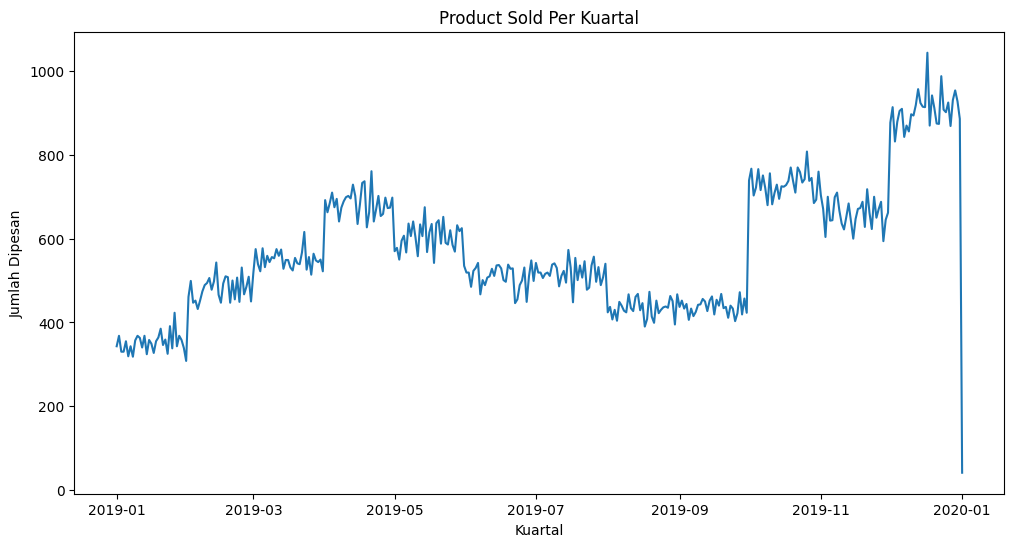

In [163]:
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['Quantity Ordered'], linestyle='-')

# Menambahkan label sumbu x dan y, serta judul
plt.xlabel('Kuartal')
plt.ylabel('Jumlah Dipesan')
plt.title('Product Sold Per Kuartal')



# Menampilkan plot
plt.show()

In [164]:
timeseries2 = df.groupby(by='Order Date').agg({
      'turnover':'sum'
})
quarterly_data = timeseries2.resample('W').sum()

In [165]:
quarterly_data

,turnover
Order Date,
2019-01-06,344855.67
2019-01-13,409428.28
2019-01-20,394936.90
2019-01-27,426632.16
2019-02-03,460355.55
2019-02-10,566203.88
2019-02-17,568227.10
2019-02-24,535323.33
2019-03-03,578418.38


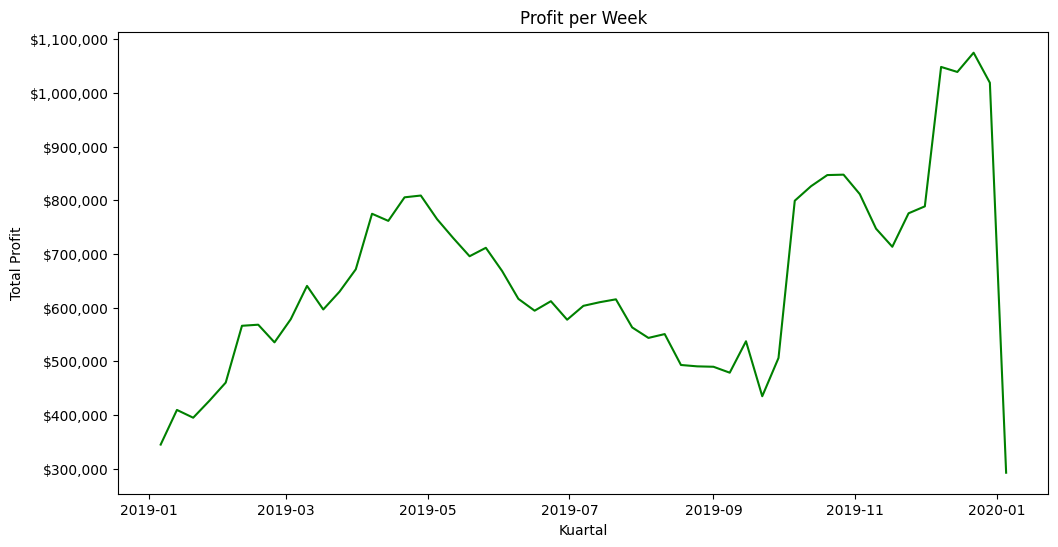

In [180]:
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, quarterly_data['turnover'], color='green', linestyle='-')
plt.xlabel('Kuartal')
plt.ylabel('Total Profit')
plt.title('Profit per Week')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.show()

In [170]:
product = df.groupby(by='Product').agg({
      'turnover':'sum'
})
product = product.sort_values(by='turnover', ascending=False)
product


,turnover
Product,
Macbook Pro Laptop,8037600.00
iPhone,4794300.00
ThinkPad Laptop,4129958.70
Google Phone,3319200.00
27in 4K Gaming Monitor,2435097.56
34in Ultrawide Monitor,2355558.01
Apple Airpods Headphones,2349150.00
Flatscreen TV,1445700.00
Bose SoundSport Headphones,1345565.43


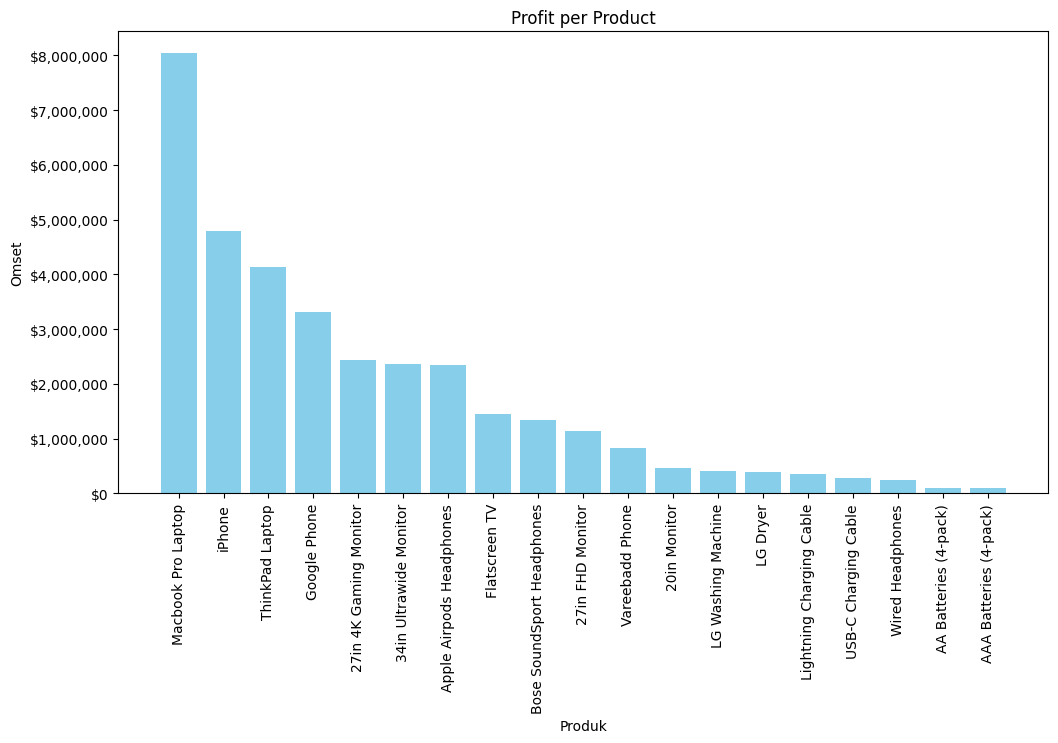

In [179]:
import matplotlib.ticker as mtick
plt.figure(figsize=(12, 6))
plt.bar(product.index, product['turnover'], color='skyblue')
plt.xlabel('Produk')
plt.ylabel('Omset')
plt.title('Profit per Product')
plt.xticks(rotation=90)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.show()


In [184]:
city = df.groupby(by='City').agg({
      'turnover':'sum'
})
city = city.sort_values(by='turnover', ascending=False)
city

,turnover
City,
San Francisco,8262203.91
Los Angeles,5452570.80
New York City,4664317.43
Boston,3661642.01
Atlanta,2795498.58
Dallas,2767975.40
Seattle,2747755.48
Portland,2320490.61
Austin,1819581.75


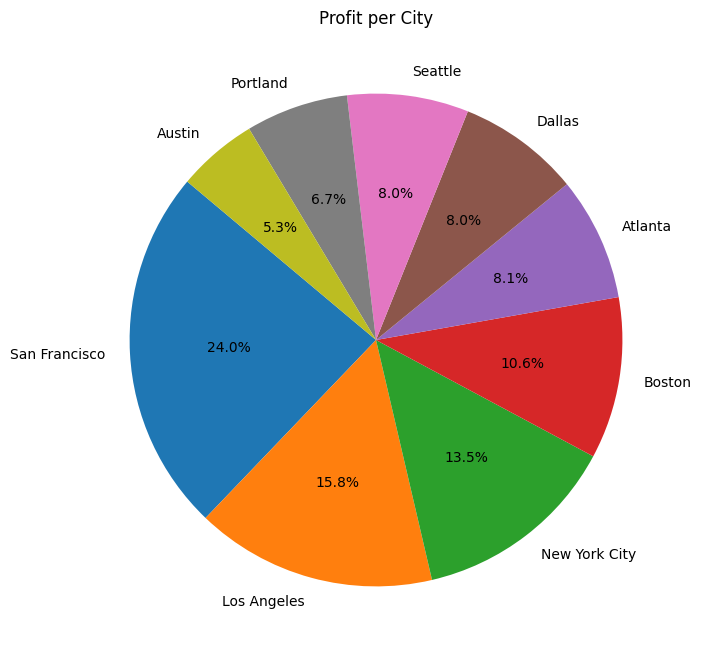

In [186]:
plt.figure(figsize=(8, 8))
plt.pie(city['turnover'], labels=city.index, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Profit per City')

# Menampilkan pie chart
plt.show()

In [189]:
month = df.groupby(by='Month').agg({
      'turnover':'sum'
})
month = month.sort_values(by='Month')
month

,turnover
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


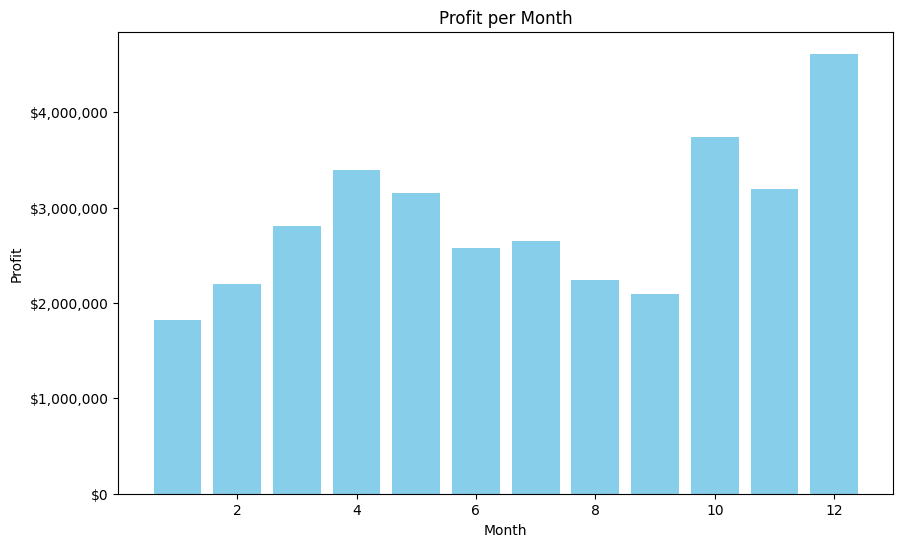

In [203]:
plt.figure(figsize=(10, 6))
plt.bar(month.index, month['turnover'], color='skyblue')

# Menambahkan label sumbu x dan y, serta judul
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Profit per Month')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
# Menampilkan plot
plt.show()

In [194]:
day = df.groupby(by='Day').agg({
      'turnover':'mean'
})
day = day.sort_values(by='Day')
day

,turnover
Day,
1,192.748182
2,183.549627
3,184.642189
4,191.865763
5,188.585503
6,189.217492
7,181.468031
8,182.440884
9,191.241483


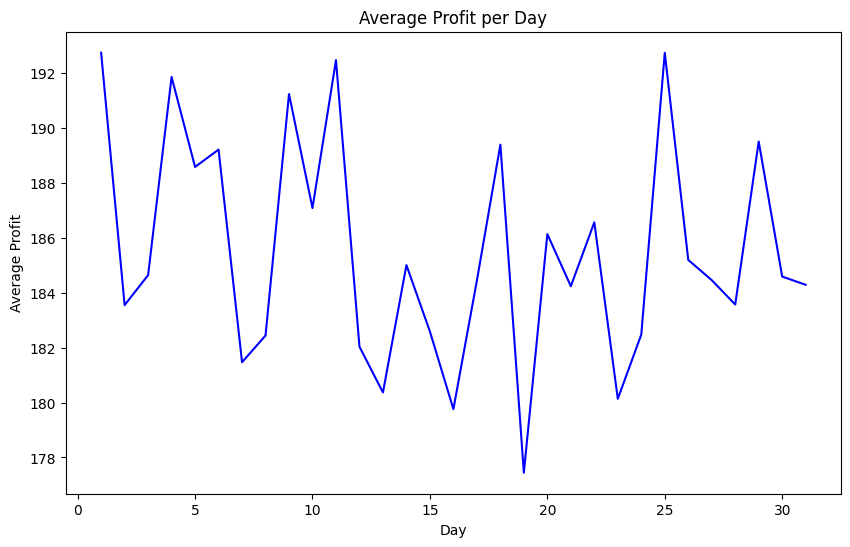

In [202]:
plt.figure(figsize=(10, 6))
plt.plot(day.index, day['turnover'], color='blue')

# Menambahkan label sumbu x dan y, serta judul
plt.xlabel('Day')
plt.ylabel('Average Profit')
plt.title('Average Profit per Day')

# Menampilkan grid


# Menampilkan plot
plt.show()